# Exercise 7.10

This question relates to the `College` data set.

## (a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [ ]:
set.seed(1)
train <- sample(777, 389)
regfit.fwd <- regsubsets(Outstate ~ ., data=College, subset=train, method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College, subset = train, 
    method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
2  ( 1 ) " "        " "  " "    " "    " "       " "  

The best eight-variable model identified by forward stepwise selection is as follows.

In [ ]:
data.frame(coef(regfit.fwd, 8))

,coef.regfit.fwd..8.
,<dbl>
(Intercept),-3509.9916549
PrivateYes,2728.2103437
Top10perc,19.1154147
Room.Board,1.0899415
Personal,-0.3692151
Terminal,32.8491535
perc.alumni,51.5974217
Expend,0.1720962
Grad.Rate,26.2101560


## (b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

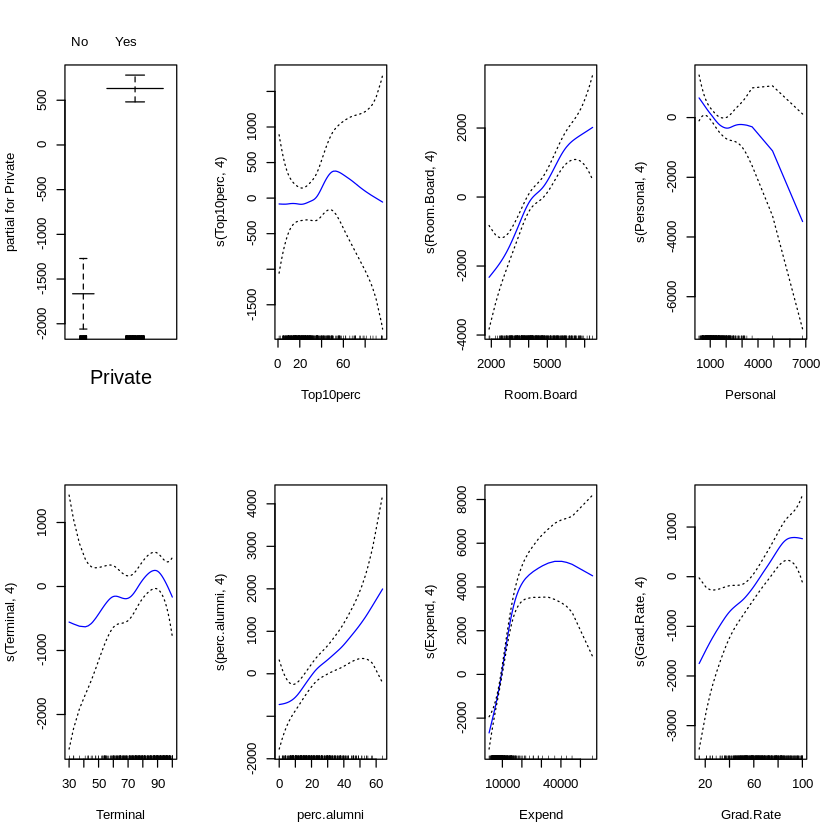

In [ ]:
gam.fit <- gam(Outstate ~ Private + s(Top10perc, 4) + s(Room.Board, 4) + s(Personal, 4) + s(Terminal, 4)
                + s(perc.alumni, 4) + s(Expend, 4) + s(Grad.Rate, 4), data=College, subset=train)
par(mfrow=c(2, 4))
plot(gam.fit, se=TRUE, col='blue')

Some variables, such as `Expend`, appear to have non-linear relationships with the response.

## (c) Evaluate the model obtained on the test set, and explain the results obtained.

In [ ]:
test <- College[-train,]
pred <- predict(gam.fit, test)
TSS <- sum((test$Outstate - mean(test$Outstate))^2)
1-sum((test$Outstate - pred)^2)/TSS

[1] 0.7662875

Since $R^2$ measures the proportion of variability in $Y$ that can be explained using $X$, about 77% of variabilty can be explained by the model.

## (d) For which variables, if any, is there evidence of a non-linear relationship with the response?

In [ ]:
summary(gam.fit)


Call: gam(formula = Outstate ~ Private + s(Top10perc, 4) + s(Room.Board, 
    4) + s(Personal, 4) + s(Terminal, 4) + s(perc.alumni, 4) + 
    s(Expend, 4) + s(Grad.Rate, 4), data = College, subset = train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-6766.32 -1109.44    16.41  1297.41  7001.36 

(Dispersion Parameter for gaussian family taken to be 3677293)

    Null Deviance: 6990014598 on 388 degrees of freedom
Residual Deviance: 1320147242 on 358.9997 degrees of freedom
AIC: 7015.495 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 1784349399 1784349399 485.235 < 2.2e-16 ***
s(Top10perc, 4)     1 1610290674 1610290674 437.901 < 2.2e-16 ***
s(Room.Board, 4)    1  676583965  676583965 183.990 < 2.2e-16 ***
s(Personal, 4)      1   69806004   69806004  18.983 1.724e-05 ***
s(Terminal, 4)      1   42834913   42834913  11.649 0.0007159 ***
s(perc.alumni, 4)

The "Anova for Nonparametric Effect" part tests a null hypothesis of a linear relationship between each variable and the response. According to the $p$-values, there is strong evidence that `Expend` has a non-linear relationship with the response.